# EXTRACT, TRANSFORM, LOAD DAN VISUALISASI DATA

#### import library

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import json
import re
import requests
import matplotlib.pyplot as plt
import sqlite3
from bs4 import BeautifulSoup

#### extract and cleaning electricity_data

In [2]:
electricity = pd.read_csv("raw_data/electricity_access_percent.csv", skiprows=4)
electricity

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,NaN,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,NaN,NaN
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,NaN,NaN
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,98.377060,0.000000,99.430435,99.773651,99.942505,99.993134,100.000000,100.000000,NaN,NaN
260,"Yemen, Rep.",YEM,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,61.751400,63.134281,64.532181,65.942101,75.600000,66.100000,70.213905,71.642349,NaN,NaN
261,South Africa,ZAF,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.700000,82.900000,84.700000,85.300000,85.400000,86.000000,85.500000,84.200000,NaN,NaN
262,Zambia,ZMB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,23.235649,22.000000,24.328644,24.894667,25.469702,27.900000,31.100000,27.219337,NaN,NaN


In [3]:
# Menghitung jumlah data yang hilang sebelum dihapus
electricity_missing_data_count = electricity.isnull().sum()
print("Jumlah data yang hilang sebelum dihapus:")
print(electricity_missing_data_count)
print("\n")
# Menghitung jumlah data duplikat sebelum dihapus
electricity_duplicate_data_count = electricity.duplicated().sum()
print("Jumlah data duplikat sebelum dihapus: ", electricity_duplicate_data_count)

Jumlah data yang hilang sebelum dihapus:
Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              264
                 ... 
2014                3
2015                3
2016                3
2017              264
Unnamed: 62       264
Length: 63, dtype: int64


Jumlah data duplikat sebelum dihapus:  0


In [4]:
# Mengatasi data yang hilang
clean_electricity_data_missing = electricity.dropna(axis=1, how='all')
print("Data yang hilang telah dihapus.")
print (clean_electricity_data_missing)

Data yang hilang telah dihapus.
     Country Name Country Code                           Indicator Name  \
0           Aruba          ABW  Access to electricity (% of population)   
1     Afghanistan          AFG  Access to electricity (% of population)   
2          Angola          AGO  Access to electricity (% of population)   
3         Albania          ALB  Access to electricity (% of population)   
4         Andorra          AND  Access to electricity (% of population)   
..            ...          ...                                      ...   
259        Kosovo          XKX  Access to electricity (% of population)   
260   Yemen, Rep.          YEM  Access to electricity (% of population)   
261  South Africa          ZAF  Access to electricity (% of population)   
262        Zambia          ZMB  Access to electricity (% of population)   
263      Zimbabwe          ZWE  Access to electricity (% of population)   

     Indicator Code        1990        1991        1992        1993

In [5]:
# Menghapus data duplikat
clean_electricity_data_duplikat = clean_electricity_data_missing.drop_duplicates()
print("Data duplikat telah dihapus.")
print(clean_electricity_data_duplikat)

Data duplikat telah dihapus.
     Country Name Country Code                           Indicator Name  \
0           Aruba          ABW  Access to electricity (% of population)   
1     Afghanistan          AFG  Access to electricity (% of population)   
2          Angola          AGO  Access to electricity (% of population)   
3         Albania          ALB  Access to electricity (% of population)   
4         Andorra          AND  Access to electricity (% of population)   
..            ...          ...                                      ...   
259        Kosovo          XKX  Access to electricity (% of population)   
260   Yemen, Rep.          YEM  Access to electricity (% of population)   
261  South Africa          ZAF  Access to electricity (% of population)   
262        Zambia          ZMB  Access to electricity (% of population)   
263      Zimbabwe          ZWE  Access to electricity (% of population)   

     Indicator Code        1990        1991        1992        1993  \

In [6]:
print(clean_electricity_data_duplikat.dtypes)

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996              float64
1997              float64
1998              float64
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004              float64
2005              float64
2006              float64
2007              float64
2008              float64
2009              float64
2010              float64
2011              float64
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
dtype: object


In [7]:
clean_electricity_data_duplikat.to_csv("clean_data/cleaned_electricity_data.csv", index=False)
print("Data yang telah dibersihkan disimpan di folder clean_data bernama cleaned_electricity_data.csv")

Data yang telah dibersihkan disimpan di folder clean_data bernama cleaned_electricity_data.csv


In [8]:
clean_electricity_data_duplikat = clean_electricity_data_duplikat.drop(columns=['Indicator Name', 'Indicator Code'])

clean_electricity_data_duplikat

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,88.445351,88.780846,89.115829,89.447754,89.773560,90.090187,90.394585,90.683678,...,92.838821,93.086166,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145
1,Afghanistan,AFG,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,33.748680,42.400000,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138
2,Angola,AGO,11.397808,12.579379,13.760440,14.938441,16.110325,17.273031,18.423502,19.558676,...,37.500000,31.268013,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607
3,Albania,ALB,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
4,Andorra,AND,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,87.694695,88.333473,88.971748,89.606956,90.236053,90.855965,91.463646,92.056030,...,97.244034,97.794670,98.377060,0.000000,99.430435,99.773651,99.942505,99.993134,100.000000,100.000000
260,"Yemen, Rep.",YEM,36.009098,37.441071,44.100000,40.300938,41.723221,43.136330,44.537205,42.600000,...,59.042709,60.386539,61.751400,63.134281,64.532181,65.942101,75.600000,66.100000,70.213905,71.642349
261,South Africa,ZAF,59.337940,60.575081,61.811710,63.045284,64.272736,65.491013,57.600000,67.887794,...,82.000000,81.900000,82.700000,82.900000,84.700000,85.300000,85.400000,86.000000,85.500000,84.200000
262,Zambia,ZMB,13.900000,14.115426,19.200000,15.287503,15.865894,16.435108,17.300000,17.533768,...,18.500000,22.714685,23.235649,22.000000,24.328644,24.894667,25.469702,27.900000,31.100000,27.219337


In [9]:
clean_electricity_data_duplikat = pd.melt(clean_electricity_data_duplikat, 
                               id_vars=['Country Name', 'Country Code'], 
                               var_name='Year', 
                               value_name='electricityaccesspercent')
clean_electricity_data_duplikat

,Country Name,Country Code,Year,electricityaccesspercent
0,Aruba,ABW,1990,88.445351
1,Afghanistan,AFG,1990,0.010000
2,Angola,AGO,1990,11.397808
3,Albania,ALB,1990,100.000000
4,Andorra,AND,1990,100.000000
...,...,...,...,...
7123,Kosovo,XKX,2016,100.000000
7124,"Yemen, Rep.",YEM,2016,71.642349
7125,South Africa,ZAF,2016,84.200000
7126,Zambia,ZMB,2016,27.219337


#### extract and cleaning gdp_data

In [10]:
gdp = pd.read_csv("raw_data/gdp_data.csv", skiprows=4)
gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.653793e+09,5.829934e+09,6.686683e+09,6.500193e+09,7.073420e+09,7.386891e+09,6.439947e+09,6.715487e+09,7.128691e+09,NaN
260,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.513027e+10,3.090675e+10,3.272642e+10,3.540133e+10,4.041524e+10,4.322858e+10,3.460248e+10,1.821333e+10,NaN,NaN
261,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,...,2.972167e+11,3.752981e+11,4.168782e+11,3.963327e+11,3.668294e+11,3.509046e+11,3.177410e+11,2.957627e+11,3.494193e+11,NaN
262,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.095475e+10,2.580867e+10,NaN


In [11]:
# Menghitung jumlah data yang hilang sebelum dihapus
gdp_missing_data_count = gdp.isnull().sum()
print("Jumlah data yang hilang sebelum dihapus:")
print(gdp_missing_data_count)
print("\n")
# Menghitung jumlah data duplikat sebelum dihapus
gdp_duplicate_data_count = gdp.duplicated().sum()
print("Jumlah data duplikat sebelum dihapus:", gdp_duplicate_data_count)

Jumlah data yang hilang sebelum dihapus:
Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2014               17
2015               18
2016               23
2017               30
Unnamed: 62       264
Length: 63, dtype: int64


Jumlah data duplikat sebelum dihapus: 0


In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=0)
gdp_imputed = imputer.fit_transform(gdp)
clean_gdp_data_missing = pd.DataFrame(gdp_imputed, columns=gdp.columns)

print("Setelah mengatasi data yang hilang\n")
print(clean_gdp_data_missing)

Setelah mengatasi data yang hilang

     Country Name Country Code     Indicator Name  Indicator Code  \
0           Aruba          ABW  GDP (current US$)  NY.GDP.MKTP.CD   
1     Afghanistan          AFG  GDP (current US$)  NY.GDP.MKTP.CD   
2          Angola          AGO  GDP (current US$)  NY.GDP.MKTP.CD   
3         Albania          ALB  GDP (current US$)  NY.GDP.MKTP.CD   
4         Andorra          AND  GDP (current US$)  NY.GDP.MKTP.CD   
..            ...          ...                ...             ...   
259        Kosovo          XKX  GDP (current US$)  NY.GDP.MKTP.CD   
260   Yemen, Rep.          YEM  GDP (current US$)  NY.GDP.MKTP.CD   
261  South Africa          ZAF  GDP (current US$)  NY.GDP.MKTP.CD   
262        Zambia          ZMB  GDP (current US$)  NY.GDP.MKTP.CD   
263      Zimbabwe          ZWE  GDP (current US$)  NY.GDP.MKTP.CD   

                 1960              1961              1962               1963  \
0                   0                 0                

In [13]:
# Menghapus data duplikat
clean_gdp_data_duplikat = clean_gdp_data_missing.drop_duplicates()
print("Data duplikat telah dihapus.")
print(clean_gdp_data_duplikat)

Data duplikat telah dihapus.
     Country Name Country Code     Indicator Name  Indicator Code  \
0           Aruba          ABW  GDP (current US$)  NY.GDP.MKTP.CD   
1     Afghanistan          AFG  GDP (current US$)  NY.GDP.MKTP.CD   
2          Angola          AGO  GDP (current US$)  NY.GDP.MKTP.CD   
3         Albania          ALB  GDP (current US$)  NY.GDP.MKTP.CD   
4         Andorra          AND  GDP (current US$)  NY.GDP.MKTP.CD   
..            ...          ...                ...             ...   
259        Kosovo          XKX  GDP (current US$)  NY.GDP.MKTP.CD   
260   Yemen, Rep.          YEM  GDP (current US$)  NY.GDP.MKTP.CD   
261  South Africa          ZAF  GDP (current US$)  NY.GDP.MKTP.CD   
262        Zambia          ZMB  GDP (current US$)  NY.GDP.MKTP.CD   
263      Zimbabwe          ZWE  GDP (current US$)  NY.GDP.MKTP.CD   

                 1960              1961              1962               1963  \
0                   0                 0                 0     

##### Imputing Data pada dataset gdp_data.csv

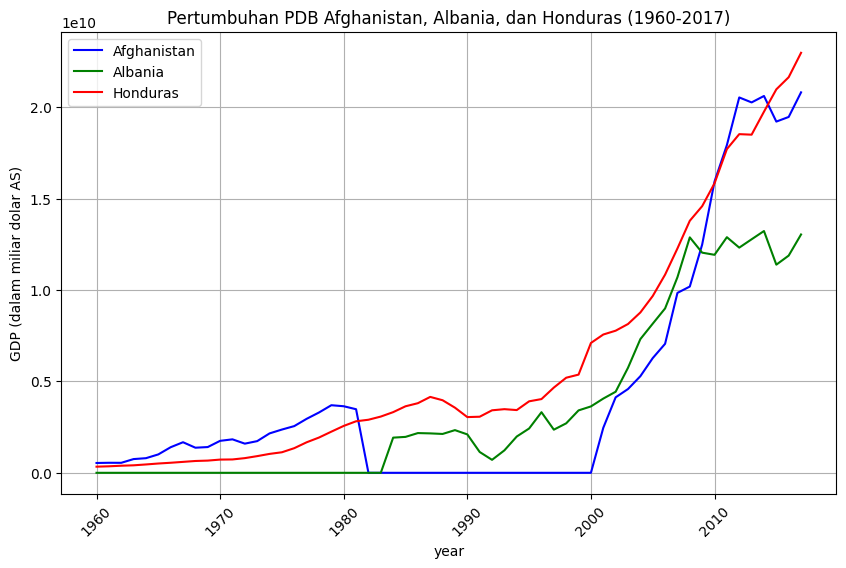

In [14]:
# Membuat plot garis
plt.figure(figsize=(10, 6))

# Mendapatkan nilai GDP untuk Afghanistan, Albania, dan Honduras
afghanistan_gdp = clean_gdp_data_duplikat.loc[clean_gdp_data_duplikat['Country Name'] == 'Afghanistan', '1960':'2017'].values.flatten()
albania_gdp = clean_gdp_data_duplikat.loc[clean_gdp_data_duplikat['Country Name'] == 'Albania', '1960':'2017'].values.flatten()
honduras_gdp = clean_gdp_data_duplikat.loc[clean_gdp_data_duplikat['Country Name'] == 'Honduras', '1960':'2017'].values.flatten()

plt.plot(range(1960, 2018), afghanistan_gdp, label="Afghanistan", color="blue")
plt.plot(range(1960, 2018), albania_gdp, label="Albania", color="green")
plt.plot(range(1960, 2018), honduras_gdp, label="Honduras", color="red")

plt.xlabel("year")
plt.ylabel("GDP (dalam miliar dolar AS)")
plt.title("Pertumbuhan PDB Afghanistan, Albania, dan Honduras (1960-2017)")

# Menambahkan label tahun pada sumbu x hanya setiap 5 tahun
plt.xticks(range(1960, 2018, 10), rotation=45)

plt.legend()
plt.grid(True)

plt.show()

In [15]:
clean_gdp_data_duplikat.to_csv("clean_data/cleaned_gdp_data.csv", index=False)
print("Data yang telah dibersihkan disimpan di folder clean_data bernama cleaned_gdp_data.csv")

Data yang telah dibersihkan disimpan di folder clean_data bernama cleaned_gdp_data.csv


In [16]:
clean_gdp_data_duplikat_1 = clean_gdp_data_duplikat.drop(columns=['Indicator Name', 'Indicator Code','Unnamed: 62'])

clean_gdp_data_duplikat_1

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,0,0,0,0,0,0,0,0,...,2791960893.85475,2498932960.89385,2467703910.61453,2584463687.15084,0,0,0,0,0,0
1,Afghanistan,AFG,537777811.111111,548888895.555556,546666677.777778,751111191.111111,800000044.444444,1006666637.77778,1399999966.66667,1673333417.77778,...,10190529882.487801,12486943505.7381,15936800636.248699,17930239399.814899,20536542736.729698,20264253973.785801,20616104298.497501,19215562179.0117,19469022207.6852,20815300220.042801
2,Angola,AGO,0,0,0,0,0,0,0,0,...,84178035578.822296,75492385928.333206,82526143645.062302,104115807985.964996,113923162050.110992,124912503781.147995,126730196125.425003,102621215573.455994,95337203468.115601,124209385825.220001
3,Albania,ALB,0,0,0,0,0,0,0,0,...,12881352687.7773,12044212903.816799,11926953258.916,12890867538.530199,12319784787.2987,12776277515.48,13228244357.181299,11386931489.796801,11883682170.823601,13039352743.961599
4,Andorra,AND,0,0,0,0,0,0,0,0,...,4007353156.58415,3660530702.97305,3355695364.23841,3442062830.13622,3164615186.94591,3281585236.32501,3350736367.25488,2811489408.89431,2877311946.90265,3012914131.16971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,0,0,0,0,0,0,0,0,...,5687488208.58356,5653792720.20006,5829933774.83444,6686683347.2338,6500192727.73995,7073420074.34944,7386891336.07536,6439946767.21748,6715486725.66372,7128690556.68244
260,"Yemen, Rep.",YEM,0,0,0,0,0,0,0,0,...,26910851361.755501,25130274124.252399,30906748941.208599,32726417212.348,35401325143.617897,40415235701.987099,43228582065.242699,34602480338.778,18213328571.4286,0
261,South Africa,ZAF,7575248495.0301,7972840543.18914,8497830043.39913,9423211535.769279,10373792524.1495,11334173316.533701,12354752904.9419,13777124457.510799,...,287099991516.900024,297216730668.942017,375298134440.468994,416878162440.887024,396332702639.495972,366829390478.953979,350904575292.317017,317741039197.848022,295762685147.666992,349419343614.088989
262,Zambia,ZMB,713000000.0,696285714.285714,693142857.142857,718714285.714286,839428571.428571,1082857142.85714,1264285714.28571,1368000000.0,...,17910858637.9048,15328342303.9575,20265556273.582001,23460098339.7453,25503370699.2015,28045460442.187599,27150630607.203201,21154394545.895,20954754378.1394,25808666421.555801


In [17]:
clean_gdp_data_duplikat_1 = pd.melt(clean_gdp_data_duplikat_1, 
                               id_vars=['Country Name', 'Country Code'], 
                               var_name='Year', 
                               value_name='gdp')
clean_gdp_data_duplikat_1

,Country Name,Country Code,Year,gdp
0,Aruba,ABW,1960,0
1,Afghanistan,AFG,1960,537777811.111111
2,Angola,AGO,1960,0
3,Albania,ALB,1960,0
4,Andorra,AND,1960,0
...,...,...,...,...
15307,Kosovo,XKX,2017,7128690556.68244
15308,"Yemen, Rep.",YEM,2017,0
15309,South Africa,ZAF,2017,349419343614.088989
15310,Zambia,ZMB,2017,25808666421.555801


#### extract and cleaning mystery

In [18]:
# Menentukan encoding saat membaca file CSV
mystery = pd.read_csv("raw_data\mystery.csv", encoding='utf-16')

# Menampilkan DataFrame
mystery

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


In [19]:
# Menghitung jumlah data yang hilang sebelum dihapus
mystery_missing_data_count = mystery.isnull().sum()
print("Jumlah data yang hilang sebelum dihapus:\n")
print(mystery_missing_data_count)
print("\n")
# Menghitung jumlah data duplikat sebelum dihapus
mystery_duplicate_data_count = mystery.duplicated().sum()
print("Jumlah data duplikat sebelum dihapus:", mystery_duplicate_data_count)

Jumlah data yang hilang sebelum dihapus:

Unnamed: 0        0
Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
                 ..
2013              2
2014              2
2015              2
2016              2
2017              2
Length: 63, dtype: int64


Jumlah data duplikat sebelum dihapus: 0


In [20]:
# Mengatasi data yang hilang
clean_mystery_data_missing = mystery.dropna()
print("Data yang hilang telah dihapus.")
print (clean_mystery_data_missing)

Data yang hilang telah dihapus.
     Unnamed: 0  Country Name Country Code     Indicator Name Indicator Code  \
0             0         Aruba          ABW  Population, total    SP.POP.TOTL   
1             1   Afghanistan          AFG  Population, total    SP.POP.TOTL   
2             2        Angola          AGO  Population, total    SP.POP.TOTL   
3             3       Albania          ALB  Population, total    SP.POP.TOTL   
4             4       Andorra          AND  Population, total    SP.POP.TOTL   
..          ...           ...          ...                ...            ...   
259         259        Kosovo          XKX  Population, total    SP.POP.TOTL   
260         260   Yemen, Rep.          YEM  Population, total    SP.POP.TOTL   
261         261  South Africa          ZAF  Population, total    SP.POP.TOTL   
262         262        Zambia          ZMB  Population, total    SP.POP.TOTL   
263         263      Zimbabwe          ZWE  Population, total    SP.POP.TOTL   

       

In [21]:
# Menghapus data duplikat
clean_mystery_data_duplikat = clean_mystery_data_missing.drop_duplicates()
print("Data duplikat telah dihapus.")
print(clean_mystery_data_duplikat)

Data duplikat telah dihapus.
     Unnamed: 0  Country Name Country Code     Indicator Name Indicator Code  \
0             0         Aruba          ABW  Population, total    SP.POP.TOTL   
1             1   Afghanistan          AFG  Population, total    SP.POP.TOTL   
2             2        Angola          AGO  Population, total    SP.POP.TOTL   
3             3       Albania          ALB  Population, total    SP.POP.TOTL   
4             4       Andorra          AND  Population, total    SP.POP.TOTL   
..          ...           ...          ...                ...            ...   
259         259        Kosovo          XKX  Population, total    SP.POP.TOTL   
260         260   Yemen, Rep.          YEM  Population, total    SP.POP.TOTL   
261         261  South Africa          ZAF  Population, total    SP.POP.TOTL   
262         262        Zambia          ZMB  Population, total    SP.POP.TOTL   
263         263      Zimbabwe          ZWE  Population, total    SP.POP.TOTL   

          

In [22]:
clean_mystery_data_duplikat.to_csv("clean_data/cleaned_mystery_data.csv", index=False)
print("Data yang telah dibersihkan disimpan di folder clean_data bernama cleaned_mystery_data.csv")

Data yang telah dibersihkan disimpan di folder clean_data bernama cleaned_mystery_data.csv


#### extract and cleaning projects_data

In [23]:
projects = pd.read_csv("raw_data/projects_data.csv")
projects

C:\Users\dzikri\AppData\Local\Temp\ipykernel_28204\3393247988.py:1: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  projects = pd.read_csv("raw_data/projects_data.csv")


,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile;Republic of Chile,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg;Grand Duchy of Luxem...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18245,P037362,Europe and Central Asia,Kingdom of Denmark;Kingdom of Denmark,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands;Kingdom of the Neth...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
columns_drop = ['projectdoc ', 'majorsector_percent ', 'sector1', 'sector2', 
                   'sector3', 'sector4', 'sector5', 'sector', 'mjsector1', 
                   'mjsector2', 'mjsector3', 'mjsector4', 'mjsector5', 
                   'mjsector', 'theme1', 'theme2', 'theme3', 'theme4', 
                   'theme5', 'theme ', 'goal', 'financier', 'mjtheme1name', 
                   'mjtheme2name', 'mjtheme3name', 'mjtheme4name', 
                   'mjtheme5name', 'location', 'GeoLocID', 'GeoLocName', 
                   'Latitude', 'Longitude', 'Country', 'borrower', 'impagency', 'Unnamed: 56']
projects.drop(columns=columns_drop, axis=1, inplace=True)

In [25]:
projects['countryname'] = projects['countryname'].str.split(';').str[0]
projects['boardapprovaldate'] = pd.to_datetime(projects['boardapprovaldate'])
projects['boardapprovaldate'] = projects['boardapprovaldate'].dt.year
projects['boardapprovaldate'].fillna(0, inplace=True)
projects['boardapprovaldate'] = projects['boardapprovaldate'].astype(int)
projects['closingdate'] = pd.to_datetime(projects['closingdate'])

projects[['lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt']] = projects[['lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt']].replace({',' : ''}, regex=True)
projects['lendprojectcost'].fillna(0, inplace=True)
projects['lendprojectcost'] = projects['lendprojectcost'].astype(np.int64)

print(projects.dtypes)
projects.head(10)

C:\Users\dzikri\AppData\Local\Temp\ipykernel_28204\3110718017.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  projects['boardapprovaldate'].fillna(0, inplace=True)


id                                       object
regionname                               object
countryname                              object
prodline                                 object
lendinginstr                             object
lendinginstrtype                         object
envassesmentcategorycode                 object
supplementprojectflg                     object
productlinetype                          object
projectstatusdisplay                     object
status                                   object
project_name                             object
boardapprovaldate                         int32
board_approval_month                     object
closingdate                 datetime64[ns, UTC]
lendprojectcost                           int64
ibrdcommamt                              object
idacommamt                               object
totalamt                                 object
grantamt                                 object
url                                     

C:\Users\dzikri\AppData\Local\Temp\ipykernel_28204\3110718017.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  projects['lendprojectcost'].fillna(0, inplace=True)


,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,project_name,boardapprovaldate,board_approval_month,closingdate,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,url
0,P162228,Other,World,RE,Investment Project Financing,IN,C,N,L,Active,...,Creating a Trade in Value-Added Database for ...,2018,June,NaT,500000,0,0,0,500000,http://projects.worldbank.org/P162228?lang=en
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,B,N,L,Active,...,Productive Inclusion Project,2018,June,2023-12-31 00:00:00+00:00,200000000,0,200000000,200000000,0,http://projects.worldbank.org/P163962?lang=en
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,Additional Financing for Health Sector Support...,2018,June,NaT,50000000,0,58330000,58330000,0,http://projects.worldbank.org/P167672?lang=en
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,A,N,L,Active,...,Public-Private Partnerships and Public Investm...,2018,June,2023-06-28 00:00:00+00:00,50000000,0,20000000,20000000,0,http://projects.worldbank.org/P158768?lang=en
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,B,N,L,Active,...,Nigeria For Women Project,2018,June,2023-05-31 00:00:00+00:00,100000000,0,100000000,100000000,0,http://projects.worldbank.org/P161364?lang=en
5,P161483,Middle East and North Africa,Republic of Tunisia,PE,Development Policy Lending,AD,NaN,N,L,Active,...,Tunisia Investment; Competitiveness and Inclusion,2018,June,2019-12-31 00:00:00+00:00,500000000,500000000,0,500000000,0,http://projects.worldbank.org/P161483?lang=en
6,P161885,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,B,N,L,Active,...,Nigeria Electrification Project,2018,June,2023-10-31 00:00:00+00:00,765000000,0,350000000,350000000,0,http://projects.worldbank.org/P161885?lang=en
7,P162069,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,B,N,L,Active,...,Nigeria- Accelerating Nutrition Results,2018,June,2023-12-31 00:00:00+00:00,232000000,0,225000000,225000000,0,http://projects.worldbank.org/P162069?lang=en
8,P163540,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,C,N,L,Active,...,Fiscal Governance and Institutions Project,2018,June,2022-12-31 00:00:00+00:00,125000000,0,125000000,125000000,0,http://projects.worldbank.org/P163540?lang=en
9,P163576,Middle East and North Africa,Lebanese Republic,PE,Program-for-Results,PR,NaN,N,L,Active,...,Creating Economic Opportunities - Lebanon Nati...,2018,June,2023-12-31 00:00:00+00:00,695000000,329900000,0,329900000,0,http://projects.worldbank.org/P163576?lang=en


In [26]:
# Menghitung jumlah data yang hilang sebelum dihapus
projects_missing_data_count = projects.isnull().sum()
print("Jumlah data yang hilang sebelum dihapus:")
print(projects_missing_data_count)
print("\n")
# Menghitung jumlah data duplikat sebelum dihapus
projects_duplicate_data_count = projects.duplicated().sum()
print("Jumlah data duplikat sebelum dihapus:", projects_duplicate_data_count)

Jumlah data yang hilang sebelum dihapus:
id                             0
regionname                     0
countryname                    0
prodline                       0
lendinginstr                 246
lendinginstrtype             246
envassesmentcategorycode    5811
supplementprojectflg          53
productlinetype                0
projectstatusdisplay           4
status                         4
project_name                   0
boardapprovaldate              0
board_approval_month        1504
closingdate                 3349
lendprojectcost                0
ibrdcommamt                    0
idacommamt                     0
totalamt                       0
grantamt                       0
url                            0
dtype: int64


Jumlah data duplikat sebelum dihapus: 0


In [27]:
# Mengatasi data yang hilang
clean_projects_data_missing = projects.dropna(axis=1, how='all')
clean_projects_data_missing = projects.fillna(0)
print("Data yang hilang telah dihapus.")
print (clean_projects_data_missing)

Data yang hilang telah dihapus.
            id                   regionname                       countryname  \
0      P162228                        Other                             World   
1      P163962                       Africa  Democratic Republic of the Congo   
2      P167672                   South Asia   People's Republic of Bangladesh   
3      P158768                   South Asia  Islamic  Republic of Afghanistan   
4      P161364                       Africa       Federal Republic of Nigeria   
...        ...                          ...                               ...   
18243  P006578  Latin America and Caribbean                 Republic of Chile   
18244  P037451      Europe and Central Asia         Grand Duchy of Luxembourg   
18245  P037362      Europe and Central Asia                Kingdom of Denmark   
18246  P037452      Europe and Central Asia        Kingdom of the Netherlands   
18247  P037383      Europe and Central Asia                   French Republic

In [28]:
# Menghapus data duplikat
clean_projects_data_duplikat = clean_projects_data_missing.drop_duplicates()
print("Data duplikat telah dihapus.")
print(clean_projects_data_duplikat)

Data duplikat telah dihapus.
            id                   regionname                       countryname  \
0      P162228                        Other                             World   
1      P163962                       Africa  Democratic Republic of the Congo   
2      P167672                   South Asia   People's Republic of Bangladesh   
3      P158768                   South Asia  Islamic  Republic of Afghanistan   
4      P161364                       Africa       Federal Republic of Nigeria   
...        ...                          ...                               ...   
18243  P006578  Latin America and Caribbean                 Republic of Chile   
18244  P037451      Europe and Central Asia         Grand Duchy of Luxembourg   
18245  P037362      Europe and Central Asia                Kingdom of Denmark   
18246  P037452      Europe and Central Asia        Kingdom of the Netherlands   
18247  P037383      Europe and Central Asia                   French Republic   

In [29]:
clean_projects_data_duplikat.to_csv("clean_data/cleaned_projects_data.csv", index=False)
print("Data yang telah dibersihkan disimpan di folder clean_data bernama cleaned_projects_data.csv")

Data yang telah dibersihkan disimpan di folder clean_data bernama cleaned_projects_data.csv


##### menghapus outliers projects_data

In [30]:
# # Membuat boxplot sebelum menghapus outliers
# plt.figure(figsize=(10, 6))
# plt.subplot(1, 2, 1)
# plt.boxplot(clean_projects_data_duplikat['lendprojectcost'])
# plt.title('Boxplot Sebelum Menghapus Outliers')
# plt.ylabel('Lend Project Cost')

# # Menghitung IQR
# Q1 = clean_projects_data_duplikat['lendprojectcost'].quantile(0.25)
# Q3 = clean_projects_data_duplikat['lendprojectcost'].quantile(0.75)
# IQR = Q3 - Q1

# # Menghapus outliers menggunakan teknik IQR
# clean_projects_data_duplikat_outliers = clean_projects_data_duplikat[(clean_projects_data_duplikat['lendprojectcost'] >= Q1 - 1.5 * IQR) & (clean_projects_data_duplikat['lendprojectcost'] <= Q3 + 1.5 * IQR)]

# # Membuat boxplot setelah menghapus outliers
# plt.subplot(1, 2, 2)
# plt.boxplot(clean_projects_data_duplikat_outliers['lendprojectcost'])
# plt.title('Boxplot Setelah Menghapus Outliers')
# plt.ylabel('Lend Project Cost')

# plt.show()

##### Dummy variables projects data

In [31]:
dumies = pd.get_dummies(clean_projects_data_duplikat['status'])
dummies_project = clean_projects_data_duplikat['countryname']
dummy_project_data = pd.concat([dummies_project, dumies], axis =1)
dummy_project_data


,countryname,0,Active,Closed,Dropped,Pipeline
0,World,False,True,False,False,False
1,Democratic Republic of the Congo,False,True,False,False,False
2,People's Republic of Bangladesh,False,True,False,False,False
3,Islamic Republic of Afghanistan,False,True,False,False,False
4,Federal Republic of Nigeria,False,True,False,False,False
...,...,...,...,...,...,...
18243,Republic of Chile,False,False,True,False,False
18244,Grand Duchy of Luxembourg,False,False,True,False,False
18245,Kingdom of Denmark,False,False,True,False,False
18246,Kingdom of the Netherlands,False,False,True,False,False


In [32]:
dummy_project_data.to_csv('dummy_data/dummies_project_data.csv', index=False)

##### scaling features projects data

In [33]:
scale_projects_data = ['totalamt']
# Membuat objek StandardScaler
scaler = StandardScaler()
clean_projects_data_duplikat[scale_projects_data] = scaler.fit_transform(clean_projects_data_duplikat[scale_projects_data])

clean_projects_data_duplikat

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,project_name,boardapprovaldate,board_approval_month,closingdate,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,url
0,P162228,Other,World,RE,Investment Project Financing,IN,C,N,L,Active,...,Creating a Trade in Value-Added Database for ...,2018,June,0,500000,0,0,-0.509805,500000,http://projects.worldbank.org/P162228?lang=en
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,B,N,L,Active,...,Productive Inclusion Project,2018,June,2023-12-31 00:00:00+00:00,200000000,0,200000000,1.060053,0,http://projects.worldbank.org/P163962?lang=en
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,0,Y,L,Active,...,Additional Financing for Health Sector Support...,2018,June,0,50000000,0,58330000,-0.051956,0,http://projects.worldbank.org/P167672?lang=en
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,A,N,L,Active,...,Public-Private Partnerships and Public Investm...,2018,June,2023-06-28 00:00:00+00:00,50000000,0,20000000,-0.352819,0,http://projects.worldbank.org/P158768?lang=en
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,B,N,L,Active,...,Nigeria For Women Project,2018,June,2023-05-31 00:00:00+00:00,100000000,0,100000000,0.275124,0,http://projects.worldbank.org/P161364?lang=en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile,PE,Specific Investment Loan,IN,0,N,L,Closed,...,Power and Irrigation Project,1948,March,1954-12-31 00:00:00+00:00,13500000,13500000,0,-0.403840,0,http://projects.worldbank.org/P006578/power-ir...
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,PE,Structural Adjustment Loan,AD,0,N,L,Closed,...,Steel Mill and Railway Project,1947,August,1949-03-31 00:00:00+00:00,12000000,12000000,0,-0.415613,0,http://projects.worldbank.org/P037451/steel-mi...
18245,P037362,Europe and Central Asia,Kingdom of Denmark,PE,Structural Adjustment Loan,AD,0,N,L,Closed,...,Post War Reconstruction Project,1947,August,1949-03-31 00:00:00+00:00,40000000,40000000,0,-0.195833,0,http://projects.worldbank.org/P037362/post-war...
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands,PE,Structural Adjustment Loan,AD,0,N,L,Closed,...,Post-war Reconstruction Project,1947,August,1948-06-30 00:00:00+00:00,195000000,195000000,0,1.020806,0,http://projects.worldbank.org/P037452/post-war...


#### extract and cleaning rural_population

In [34]:
rural_population = pd.read_csv("raw_data/rural_population_percent.csv", skiprows=4)
rural_population

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430,NaN
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422,NaN
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684,NaN
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Rural population (% of total population),SP.RUR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,Rural population (% of total population),SP.RUR.TOTL.ZS,90.900,90.541,90.169,89.784,89.386,88.974,...,68.835,68.268,67.698,67.126,66.550,65.973,65.394,64.813,64.231,NaN
261,South Africa,ZAF,Rural population (% of total population),SP.RUR.TOTL.ZS,53.381,53.207,53.094,52.980,52.866,52.752,...,38.313,37.782,37.254,36.728,36.212,35.702,35.199,34.705,34.218,NaN
262,Zambia,ZMB,Rural population (% of total population),SP.RUR.TOTL.ZS,81.855,81.049,80.215,79.288,77.985,76.628,...,61.701,61.275,60.847,60.413,59.973,59.528,59.078,58.621,58.160,NaN


In [35]:
# Menghitung jumlah data yang hilang sebelum dihapus
rural_missing_data_count = rural_population.isnull().sum()
print("Jumlah data yang hilang sebelum dihapus:")
print(rural_missing_data_count)
print ("\n")
# Menghitung jumlah data duplikat sebelum dihapus
rural_duplicate_data_count = rural_population.duplicated().sum()
print("Jumlah data duplikat sebelum dihapus: ", rural_duplicate_data_count)

Jumlah data yang hilang sebelum dihapus:
Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                5
                 ... 
2014                4
2015                4
2016                4
2017                4
Unnamed: 62       264
Length: 63, dtype: int64


Jumlah data duplikat sebelum dihapus:  0


In [36]:
# Mengatasi data yang hilang
clean_rural_population_missing = rural_population.dropna(axis=1, how='all')
clean_rural_population_missing = rural_population.fillna(0)
print("Data yang hilang telah dihapus.")
print (clean_rural_population_missing)
print ("\n")

Data yang hilang telah dihapus.
     Country Name Country Code                            Indicator Name  \
0           Aruba          ABW  Rural population (% of total population)   
1     Afghanistan          AFG  Rural population (% of total population)   
2          Angola          AGO  Rural population (% of total population)   
3         Albania          ALB  Rural population (% of total population)   
4         Andorra          AND  Rural population (% of total population)   
..            ...          ...                                       ...   
259        Kosovo          XKX  Rural population (% of total population)   
260   Yemen, Rep.          YEM  Rural population (% of total population)   
261  South Africa          ZAF  Rural population (% of total population)   
262        Zambia          ZMB  Rural population (% of total population)   
263      Zimbabwe          ZWE  Rural population (% of total population)   

     Indicator Code    1960    1961    1962    1963    

In [37]:
# Menghapus data duplikat
clean_rural_population_duplikat = clean_rural_population_missing.drop_duplicates()
print("Data duplikat telah dihapus.")
print(clean_rural_population_duplikat)

Data duplikat telah dihapus.
     Country Name Country Code                            Indicator Name  \
0           Aruba          ABW  Rural population (% of total population)   
1     Afghanistan          AFG  Rural population (% of total population)   
2          Angola          AGO  Rural population (% of total population)   
3         Albania          ALB  Rural population (% of total population)   
4         Andorra          AND  Rural population (% of total population)   
..            ...          ...                                       ...   
259        Kosovo          XKX  Rural population (% of total population)   
260   Yemen, Rep.          YEM  Rural population (% of total population)   
261  South Africa          ZAF  Rural population (% of total population)   
262        Zambia          ZMB  Rural population (% of total population)   
263      Zimbabwe          ZWE  Rural population (% of total population)   

     Indicator Code    1960    1961    1962    1963    196

In [38]:
clean_rural_population_duplikat.to_csv("clean_data/cleaned_rural_population_percent.csv", index=False)
print("Data yang telah dibersihkan disimpan didalam folder clean_data bernama cleaned_rural_population_percent.csv")

Data yang telah dibersihkan disimpan didalam folder clean_data bernama cleaned_rural_population_percent.csv


In [39]:
clean_rural_population_duplikat = clean_rural_population_duplikat.drop(columns=['Indicator Name', 'Indicator Code', 'Unnamed: 62'])

clean_rural_population_duplikat = pd.melt(clean_rural_population_duplikat, 
                               id_vars=['Country Name', 'Country Code'], 
                               var_name='Year', 
                               value_name='ruralpopulationpercent')
clean_rural_population_duplikat

,Country Name,Country Code,Year,ruralpopulationpercent
0,Aruba,ABW,1960,49.224
1,Afghanistan,AFG,1960,91.779
2,Angola,AGO,1960,89.565
3,Albania,ALB,1960,69.295
4,Andorra,AND,1960,41.550
...,...,...,...,...
15307,Kosovo,XKX,2017,0.000
15308,"Yemen, Rep.",YEM,2017,64.231
15309,South Africa,ZAF,2017,34.218
15310,Zambia,ZMB,2017,58.160


#### extract and cleaning population csv

In [40]:
population_csv = pd.read_csv ("raw_data/population_data.csv", skiprows=4)
population_csv

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0,NaN
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0,NaN
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0,NaN
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0,NaN


In [41]:
# Memperlihatkan Banyakanya Data Missing values
population_csv_missing_data_counts = population_csv.isnull().sum()
print("Banyaknya Data Missing : ")
print (population_csv_missing_data_counts)
print("\n")
# Memperlihatkan Banyakanya Data Duplikat
population_csv_data_duplicated_counts = population_csv.duplicated().sum()
print("Banyaknya Data Duplikat  = " , population_csv_data_duplicated_counts)

Banyaknya Data Missing : 
Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                4
                 ... 
2014                2
2015                2
2016                2
2017                2
Unnamed: 62       264
Length: 63, dtype: int64


Banyaknya Data Duplikat  =  0


In [42]:
# Mengatasi data yang hilang
clean_population_csv_missing_values = population_csv.dropna(axis=1, how='all')
print("Data yang hilang telah dihapus.")
print (clean_population_csv_missing_values)

Data yang hilang telah dihapus.
     Country Name Country Code     Indicator Name Indicator Code        1960  \
0           Aruba          ABW  Population, total    SP.POP.TOTL     54211.0   
1     Afghanistan          AFG  Population, total    SP.POP.TOTL   8996351.0   
2          Angola          AGO  Population, total    SP.POP.TOTL   5643182.0   
3         Albania          ALB  Population, total    SP.POP.TOTL   1608800.0   
4         Andorra          AND  Population, total    SP.POP.TOTL     13411.0   
..            ...          ...                ...            ...         ...   
259        Kosovo          XKX  Population, total    SP.POP.TOTL    947000.0   
260   Yemen, Rep.          YEM  Population, total    SP.POP.TOTL   5172135.0   
261  South Africa          ZAF  Population, total    SP.POP.TOTL  17456855.0   
262        Zambia          ZMB  Population, total    SP.POP.TOTL   3044846.0   
263      Zimbabwe          ZWE  Population, total    SP.POP.TOTL   3747369.0   

       

In [43]:
# Menghapus data duplikat
clean_population_csv_duplikat = clean_population_csv_missing_values.drop_duplicates()
print("Data duplikat telah dihapus.")
print(clean_population_csv_duplikat)

Data duplikat telah dihapus.
     Country Name Country Code     Indicator Name Indicator Code        1960  \
0           Aruba          ABW  Population, total    SP.POP.TOTL     54211.0   
1     Afghanistan          AFG  Population, total    SP.POP.TOTL   8996351.0   
2          Angola          AGO  Population, total    SP.POP.TOTL   5643182.0   
3         Albania          ALB  Population, total    SP.POP.TOTL   1608800.0   
4         Andorra          AND  Population, total    SP.POP.TOTL     13411.0   
..            ...          ...                ...            ...         ...   
259        Kosovo          XKX  Population, total    SP.POP.TOTL    947000.0   
260   Yemen, Rep.          YEM  Population, total    SP.POP.TOTL   5172135.0   
261  South Africa          ZAF  Population, total    SP.POP.TOTL  17456855.0   
262        Zambia          ZMB  Population, total    SP.POP.TOTL   3044846.0   
263      Zimbabwe          ZWE  Population, total    SP.POP.TOTL   3747369.0   

          

In [44]:
clean_population_csv_duplikat.to_csv("clean_data/cleaned_population_data_csv.csv", index=False)
print("Data yang telah dibersihkan disimpan di folder clean_data bernama cleaned_population_data_csv.csv")

Data yang telah dibersihkan disimpan di folder clean_data bernama cleaned_population_data_csv.csv


#### extract and cleaning population xml

In [45]:
with open('raw_data/population_data.xml', 'r') as f:
    population_xml_data = f.read()

# Membuat objek BeautifulSoup
soup_population_xml_data = BeautifulSoup(population_xml_data, 'lxml')

data = []

for record in soup_population_xml_data.find_all("record"):
    record_data = {}

    for field in record.find_all("field"):
        name = field.get("name")
        key = field.get("key")
        value = field.text

        if name == "Country or Area":
            record_data["Country Name"] = value
            record_data["Country Code"] = key
        elif name == "Item":
            record_data["Indicator Name"] = value
            record_data["Indicator Code"] = key
        else:
            record_data[name] = value

    data.append(record_data)

population_xml = pd.DataFrame(data)

population_xml

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54211
1,Aruba,ABW,"Population, total",SP.POP.TOTL,1961,55438
2,Aruba,ABW,"Population, total",SP.POP.TOTL,1962,56225
3,Aruba,ABW,"Population, total",SP.POP.TOTL,1963,56695
4,Aruba,ABW,"Population, total",SP.POP.TOTL,1964,57032
...,...,...,...,...,...,...
15307,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2013,15054506
15308,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2014,15411675
15309,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2015,15777451
15310,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2016,16150362


In [46]:
# Memperlihatkan Banyakanya Data Missing values
population_xml_missing_data_counts = population_xml.isnull().sum()
print("Banyaknya Data Missing : ")
print (population_xml_missing_data_counts)
print("\n")
# Memperlihatkan Banyakanya Data Duplikat
population_xml_duplicated_counts = population_xml.duplicated().sum()
print("Banyaknya Data Duplikat  = " , population_xml_duplicated_counts)

Banyaknya Data Missing : 
Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
Year              0
Value             0
dtype: int64


Banyaknya Data Duplikat  =  0


In [47]:
# Mengatasi data yang hilang
clean_population_xml_missing_values = population_xml.dropna()
print("Data yang hilang telah dihapus.")
print (clean_population_xml_missing_values)

Data yang hilang telah dihapus.
      Country Name Country Code     Indicator Name Indicator Code  Year  \
0            Aruba          ABW  Population, total    SP.POP.TOTL  1960   
1            Aruba          ABW  Population, total    SP.POP.TOTL  1961   
2            Aruba          ABW  Population, total    SP.POP.TOTL  1962   
3            Aruba          ABW  Population, total    SP.POP.TOTL  1963   
4            Aruba          ABW  Population, total    SP.POP.TOTL  1964   
...            ...          ...                ...            ...   ...   
15307     Zimbabwe          ZWE  Population, total    SP.POP.TOTL  2013   
15308     Zimbabwe          ZWE  Population, total    SP.POP.TOTL  2014   
15309     Zimbabwe          ZWE  Population, total    SP.POP.TOTL  2015   
15310     Zimbabwe          ZWE  Population, total    SP.POP.TOTL  2016   
15311     Zimbabwe          ZWE  Population, total    SP.POP.TOTL  2017   

          Value  
0         54211  
1         55438  
2         562

In [48]:
# Menghapus data duplikat
clean_population_xml_duplikat = clean_population_xml_missing_values.drop_duplicates()
print("Data duplikat telah dihapus.")
print(clean_population_xml_duplikat)

Data duplikat telah dihapus.
      Country Name Country Code     Indicator Name Indicator Code  Year  \
0            Aruba          ABW  Population, total    SP.POP.TOTL  1960   
1            Aruba          ABW  Population, total    SP.POP.TOTL  1961   
2            Aruba          ABW  Population, total    SP.POP.TOTL  1962   
3            Aruba          ABW  Population, total    SP.POP.TOTL  1963   
4            Aruba          ABW  Population, total    SP.POP.TOTL  1964   
...            ...          ...                ...            ...   ...   
15307     Zimbabwe          ZWE  Population, total    SP.POP.TOTL  2013   
15308     Zimbabwe          ZWE  Population, total    SP.POP.TOTL  2014   
15309     Zimbabwe          ZWE  Population, total    SP.POP.TOTL  2015   
15310     Zimbabwe          ZWE  Population, total    SP.POP.TOTL  2016   
15311     Zimbabwe          ZWE  Population, total    SP.POP.TOTL  2017   

          Value  
0         54211  
1         55438  
2         56225 

In [49]:
# Ubah kolom 'year' menjadi tipe data datetime
clean_population_xml_duplikat.drop(columns=['Indicator Name','Indicator Code'], inplace=True)
clean_population_xml_duplikat.rename(columns={'Country_or_Area': 'Country Name'}, inplace=True)
clean_population_xml_duplikat.rename(columns={'Value': 'population'}, inplace=True)

clean_population_xml_duplikat

,Country Name,Country Code,Year,population
0,Aruba,ABW,1960,54211
1,Aruba,ABW,1961,55438
2,Aruba,ABW,1962,56225
3,Aruba,ABW,1963,56695
4,Aruba,ABW,1964,57032
...,...,...,...,...
15307,Zimbabwe,ZWE,2013,15054506
15308,Zimbabwe,ZWE,2014,15411675
15309,Zimbabwe,ZWE,2015,15777451
15310,Zimbabwe,ZWE,2016,16150362


In [50]:
# Mengonversi kolom 'Population' menjadi tipe data numerik
clean_population_xml_duplikat['population'] = pd.to_numeric(clean_population_xml_duplikat['population'], errors='coerce')
print(clean_population_xml_duplikat.dtypes)

Country Name     object
Country Code     object
Year             object
population      float64
dtype: object


In [51]:
clean_population_xml_duplikat.to_csv("clean_data/cleaned_population_data_xml.csv", index=False)
print("Data yang telah dibersihkan disimpan di folder clean_data bernama cleaned_population_data_xml.csv")

Data yang telah dibersihkan disimpan di folder clean_data bernama cleaned_population_data_xml.csv


#### extract and cleaning population json

In [52]:
population_json = pd.read_json("raw_data/population_data.json")

print(population_json.head())

  Country Name Country Code     Indicator Name Indicator Code       1960  \
0        Aruba          ABW  Population, total    SP.POP.TOTL    54211.0   
1  Afghanistan          AFG  Population, total    SP.POP.TOTL  8996351.0   
2       Angola          AGO  Population, total    SP.POP.TOTL  5643182.0   
3      Albania          ALB  Population, total    SP.POP.TOTL  1608800.0   
4      Andorra          AND  Population, total    SP.POP.TOTL    13411.0   

        1961       1962       1963       1964       1965  ...        2008  \
0    55438.0    56225.0    56695.0    57032.0    57360.0  ...    101353.0   
1  9166764.0  9345868.0  9533954.0  9731361.0  9938414.0  ...  27294031.0   
2  5753024.0  5866061.0  5980417.0  6093321.0  6203299.0  ...  21759420.0   
3  1659800.0  1711319.0  1762621.0  1814135.0  1864791.0  ...   2947314.0   
4    14375.0    15370.0    16412.0    17469.0    18549.0  ...     83861.0   

         2009        2010        2011        2012        2013        2014  \
0  

In [53]:
# Memperlihatkan Banyakanya Data Missing values
population_json_missing_data_counts = population_json.isnull().sum()
print("Banyaknya Data Missing : ")
print (population_json_missing_data_counts)
print("\n")
# Memperlihatkan Banyakanya Data Duplikat
population_json_duplicated_data_counts = population_json.duplicated().sum()
print("Banyaknya Data Duplikat  = " , population_json_duplicated_data_counts)

Banyaknya Data Missing : 
Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              4
                 ..
2013              2
2014              2
2015              2
2016              2
2017              2
Length: 62, dtype: int64


Banyaknya Data Duplikat  =  0


In [54]:
# Mengatasi data yang hilang
clean_population_json_missing_values = population_json.dropna()
print("Data yang hilang telah dihapus.")
print (clean_population_json_missing_values)

Data yang hilang telah dihapus.
     Country Name Country Code     Indicator Name Indicator Code        1960  \
0           Aruba          ABW  Population, total    SP.POP.TOTL     54211.0   
1     Afghanistan          AFG  Population, total    SP.POP.TOTL   8996351.0   
2          Angola          AGO  Population, total    SP.POP.TOTL   5643182.0   
3         Albania          ALB  Population, total    SP.POP.TOTL   1608800.0   
4         Andorra          AND  Population, total    SP.POP.TOTL     13411.0   
..            ...          ...                ...            ...         ...   
259        Kosovo          XKX  Population, total    SP.POP.TOTL    947000.0   
260   Yemen, Rep.          YEM  Population, total    SP.POP.TOTL   5172135.0   
261  South Africa          ZAF  Population, total    SP.POP.TOTL  17456855.0   
262        Zambia          ZMB  Population, total    SP.POP.TOTL   3044846.0   
263      Zimbabwe          ZWE  Population, total    SP.POP.TOTL   3747369.0   

       

In [55]:
# Menghapus data duplikat
clean_population_json_duplikat = clean_population_json_missing_values.drop_duplicates()
print("Data duplikat telah dihapus.")
print(clean_population_json_duplikat)

Data duplikat telah dihapus.
     Country Name Country Code     Indicator Name Indicator Code        1960  \
0           Aruba          ABW  Population, total    SP.POP.TOTL     54211.0   
1     Afghanistan          AFG  Population, total    SP.POP.TOTL   8996351.0   
2          Angola          AGO  Population, total    SP.POP.TOTL   5643182.0   
3         Albania          ALB  Population, total    SP.POP.TOTL   1608800.0   
4         Andorra          AND  Population, total    SP.POP.TOTL     13411.0   
..            ...          ...                ...            ...         ...   
259        Kosovo          XKX  Population, total    SP.POP.TOTL    947000.0   
260   Yemen, Rep.          YEM  Population, total    SP.POP.TOTL   5172135.0   
261  South Africa          ZAF  Population, total    SP.POP.TOTL  17456855.0   
262        Zambia          ZMB  Population, total    SP.POP.TOTL   3044846.0   
263      Zimbabwe          ZWE  Population, total    SP.POP.TOTL   3747369.0   

          

In [56]:
clean_population_json_duplikat.to_csv("clean_data/cleaned_population_data_json.csv", index=False)
print("Data yang telah dibersihkan disimpan di folder clean_data bernama cleaned_population_data_json.csv")

Data yang telah dibersihkan disimpan di folder clean_data bernama cleaned_population_data_json.csv


#### extract and cleaning population db

In [57]:
conn = sqlite3.connect('raw_data/population_data.db')

# 2. Buat objek kursor
cursor = conn.cursor()

# 3. Eksekusi query SQL
cursor.execute("SELECT * FROM population_data")

# 4. Ambil hasil query
result = cursor.fetchall()

# 5. Konversi hasil query menjadi dataframe
population_db = pd.DataFrame(result, columns=[col[0] for col in cursor.description])

# 6. Tutup koneksi
conn.close()

# Tampilkan dataframe
print(population_db.head())

   index Country_Name Country_Code     Indicator_Name Indicator_Code  \
0      0        Aruba          ABW  Population, total    SP.POP.TOTL   
1      1  Afghanistan          AFG  Population, total    SP.POP.TOTL   
2      2       Angola          AGO  Population, total    SP.POP.TOTL   
3      3      Albania          ALB  Population, total    SP.POP.TOTL   
4      4      Andorra          AND  Population, total    SP.POP.TOTL   

        1960       1961       1962       1963       1964  ...        2008  \
0    54211.0    55438.0    56225.0    56695.0    57032.0  ...    101353.0   
1  8996351.0  9166764.0  9345868.0  9533954.0  9731361.0  ...  27294031.0   
2  5643182.0  5753024.0  5866061.0  5980417.0  6093321.0  ...  21759420.0   
3  1608800.0  1659800.0  1711319.0  1762621.0  1814135.0  ...   2947314.0   
4    13411.0    14375.0    15370.0    16412.0    17469.0  ...     83861.0   

         2009        2010        2011        2012        2013        2014  \
0    101453.0    101669.0  

In [58]:
# Cek missing values
missing_values = population_db.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Cek duplikasi data
duplicate_rows = population_db[population_db.duplicated()]
print("\nDuplikasi Data:")
print(duplicate_rows)


Missing Values:
index             0
Country_Name      0
Country_Code      0
Indicator_Name    0
Indicator_Code    0
                 ..
2013              2
2014              2
2015              2
2016              2
2017              2
Length: 63, dtype: int64

Duplikasi Data:
Empty DataFrame
Columns: [index, Country_Name, Country_Code, Indicator_Name, Indicator_Code, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
Index: []

[0 rows x 63 columns]


In [59]:
# Mengatasi data yang hilang
clean_population_db_missing_values = population_db.dropna()
print("Data yang hilang telah dihapus.")
# Menghapus data duplikat
clean_population_db_duplikat = clean_population_db_missing_values.drop_duplicates()
print("Data duplikat telah dihapus.")
print(clean_population_db_duplikat)


Data yang hilang telah dihapus.
Data duplikat telah dihapus.
     index  Country_Name Country_Code     Indicator_Name Indicator_Code  \
0        0         Aruba          ABW  Population, total    SP.POP.TOTL   
1        1   Afghanistan          AFG  Population, total    SP.POP.TOTL   
2        2        Angola          AGO  Population, total    SP.POP.TOTL   
3        3       Albania          ALB  Population, total    SP.POP.TOTL   
4        4       Andorra          AND  Population, total    SP.POP.TOTL   
..     ...           ...          ...                ...            ...   
259    259        Kosovo          XKX  Population, total    SP.POP.TOTL   
260    260   Yemen, Rep.          YEM  Population, total    SP.POP.TOTL   
261    261  South Africa          ZAF  Population, total    SP.POP.TOTL   
262    262        Zambia          ZMB  Population, total    SP.POP.TOTL   
263    263      Zimbabwe          ZWE  Population, total    SP.POP.TOTL   

           1960        1961        196

In [60]:
clean_population_db_duplikat.rename(columns={'Country_Name': 'Country Name'}, inplace=True)


In [61]:
clean_population_db_duplikat.to_csv("clean_data/cleaned_population_data_db.csv", index=False)
print("Data yang telah dibersihkan disimpan di folder clean_data bernama cleaned_population_data_db.csv")

Data yang telah dibersihkan disimpan di folder clean_data bernama cleaned_population_data_db.csv


#### extract api and cleaning

In [62]:
url = "https://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?format=json&per_page=30000"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()[1]  # Memilih bagian data dari JSON
    api = pd.DataFrame(data)
    columns = ['country.value', 'countryiso3code', 'indicator.id', 'indicator.value', 'date', 'value']
    api = pd.json_normalize(data)[columns]
    api.columns = ['Country Name', 'Country Code', 'Indicator Code', 'Indicator Name', 'Year', 'Population']

else:
    print("Error:", response.status_code)
    
api.head()

,Country Name,Country Code,Indicator Code,Indicator Name,Year,Population
0,Africa Eastern and Southern,AFE,SP.POP.TOTL,"Population, total",2023,NaN
1,Africa Eastern and Southern,AFE,SP.POP.TOTL,"Population, total",2022,720859132.0
2,Africa Eastern and Southern,AFE,SP.POP.TOTL,"Population, total",2021,702977106.0
3,Africa Eastern and Southern,AFE,SP.POP.TOTL,"Population, total",2020,685112979.0
4,Africa Eastern and Southern,AFE,SP.POP.TOTL,"Population, total",2019,667242986.0


In [63]:
api = api.rename(columns={'Population': 'population'})

In [64]:
api = api.drop(columns=['Indicator Code', 'Indicator Name'])

api

,Country Name,Country Code,Year,population
0,Africa Eastern and Southern,AFE,2023,NaN
1,Africa Eastern and Southern,AFE,2022,720859132.0
2,Africa Eastern and Southern,AFE,2021,702977106.0
3,Africa Eastern and Southern,AFE,2020,685112979.0
4,Africa Eastern and Southern,AFE,2019,667242986.0
...,...,...,...,...
17019,Zimbabwe,ZWE,1964,4310332.0
17020,Zimbabwe,ZWE,1963,4177931.0
17021,Zimbabwe,ZWE,1962,4049778.0
17022,Zimbabwe,ZWE,1961,3925952.0


In [65]:
# Menghitung jumlah data yang hilang sebelum dihapus
missing_data_count_api = api.isnull().sum()
print("Jumlah data yang hilang sebelum dihapus:")
print(missing_data_count_api)
print("\n")
# Menghitung jumlah data duplikat sebelum dihapus
duplicate_data_count_api= api.duplicated().sum()
print("Jumlah data duplikat sebelum dihapus: ", duplicate_data_count_api)

Jumlah data yang hilang sebelum dihapus:
Country Name      0
Country Code      0
Year              0
population      359
dtype: int64


Jumlah data duplikat sebelum dihapus:  0


In [66]:
# Mengatasi data yang hilang
clean_data_from_api_missing = api.dropna()
print("Data yang hilang telah dihapus.")
print (clean_data_from_api_missing)

Data yang hilang telah dihapus.
                      Country Name Country Code  Year   population
1      Africa Eastern and Southern          AFE  2022  720859132.0
2      Africa Eastern and Southern          AFE  2021  702977106.0
3      Africa Eastern and Southern          AFE  2020  685112979.0
4      Africa Eastern and Southern          AFE  2019  667242986.0
5      Africa Eastern and Southern          AFE  2018  649757148.0
...                            ...          ...   ...          ...
17019                     Zimbabwe          ZWE  1964    4310332.0
17020                     Zimbabwe          ZWE  1963    4177931.0
17021                     Zimbabwe          ZWE  1962    4049778.0
17022                     Zimbabwe          ZWE  1961    3925952.0
17023                     Zimbabwe          ZWE  1960    3806310.0

[16665 rows x 4 columns]


In [67]:
# Menghapus data duplikat
clean_data_from_api_duplikat = clean_data_from_api_missing.drop_duplicates()
print("Data duplikat telah dihapus.")
clean_data_from_api_duplikat

Data duplikat telah dihapus.


,Country Name,Country Code,Year,population
1,Africa Eastern and Southern,AFE,2022,720859132.0
2,Africa Eastern and Southern,AFE,2021,702977106.0
3,Africa Eastern and Southern,AFE,2020,685112979.0
4,Africa Eastern and Southern,AFE,2019,667242986.0
5,Africa Eastern and Southern,AFE,2018,649757148.0
...,...,...,...,...
17019,Zimbabwe,ZWE,1964,4310332.0
17020,Zimbabwe,ZWE,1963,4177931.0
17021,Zimbabwe,ZWE,1962,4049778.0
17022,Zimbabwe,ZWE,1961,3925952.0


In [68]:
clean_data_from_api_duplikat.to_csv("clean_data/clean_data_from_api.csv", index=False)
print("Data yang telah dibersihkan disimpan di folder clean_data bernama clean_data_from_api.csv")

Data yang telah dibersihkan disimpan di folder clean_data bernama clean_data_from_api.csv


#### Feature Engineering pada dataset population_data.csv, population_data.json, population_data.xml, dan population_data.db.

In [69]:
clean_population_csv_duplikat.update(clean_population_db_duplikat[clean_population_db_duplikat['Country Name'].isin(clean_population_csv_duplikat['Country Name'])])
clean_population_csv_duplikat.update(clean_population_xml_duplikat[clean_population_xml_duplikat['Country Name'].isin(clean_population_csv_duplikat['Country Name'])])
clean_population_csv_duplikat.update(clean_mystery_data_duplikat[clean_mystery_data_duplikat['Country Name'].isin(clean_population_csv_duplikat['Country Name'])])
clean_population_csv_duplikat.update(clean_population_json_duplikat[clean_population_json_duplikat['Country Name'].isin(clean_population_csv_duplikat['Country Name'])])
clean_population_csv_duplikat

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Andorra,AND,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,Andorra,AND,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,Andorra,AND,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,Andorra,AND,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


In [70]:
clean_population_csv_duplikat.drop(columns=['Indicator Name', 'Indicator Code'], inplace=True)

In [71]:
melt_gabungan = pd.melt(clean_population_csv_duplikat, 
                               id_vars=['Country Name', 'Country Code'], 
                               var_name='Year', 
                               value_name='population')

melt_gabungan = pd.concat([melt_gabungan, clean_data_from_api_duplikat])
melt_gabungan

,Country Name,Country Code,Year,population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996351.0
2,Angola,AGO,1960,5643182.0
3,Albania,ALB,1960,1608800.0
4,Andorra,AND,1960,13411.0
...,...,...,...,...
17019,Zimbabwe,ZWE,1964,4310332.0
17020,Zimbabwe,ZWE,1963,4177931.0
17021,Zimbabwe,ZWE,1962,4049778.0
17022,Zimbabwe,ZWE,1961,3925952.0


In [72]:
melt_gabungan.drop_duplicates(subset=['Country Name', 'Country Code', 'Year'], inplace=True)

In [73]:
melt_gabungan.to_csv('combined_data/data_combined_population.csv', index=False)

In [74]:
melt_gabungan.reset_index(drop=True)

,Country Name,Country Code,Year,population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996351.0
2,Angola,AGO,1960,5643182.0
3,Albania,ALB,1960,1608800.0
4,Andorra,AND,1960,13411.0
...,...,...,...,...
16660,Zimbabwe,ZWE,1964,4310332.0
16661,Zimbabwe,ZWE,1963,4177931.0
16662,Zimbabwe,ZWE,1962,4049778.0
16663,Zimbabwe,ZWE,1961,3925952.0


In [75]:
gdp_all_pop = pd.merge(melt_gabungan, clean_gdp_data_duplikat_1, on =['Country Name', 'Country Code', 'Year'])
gdp_all_pop

,Country Name,Country Code,Year,population,gdp
0,Aruba,ABW,1960,54211.0,0
1,Afghanistan,AFG,1960,8996351.0,537777811.111111
2,Angola,AGO,1960,5643182.0,0
3,Albania,ALB,1960,1608800.0,0
4,Andorra,AND,1960,13411.0,0
...,...,...,...,...,...
14639,Zimbabwe,ZWE,1964,4310332.0,1217138000.0
14640,Zimbabwe,ZWE,1963,4177931.0,1159511700.0
14641,Zimbabwe,ZWE,1962,4049778.0,1117601600.0
14642,Zimbabwe,ZWE,1961,3925952.0,1096646600.0


In [76]:
# gdp_all_pop.drop_duplicates(subset=["Country Name", "Country Code", "Year"], inplace=True)


In [77]:
gdp_all_pop['gdp percapita'] = gdp_all_pop['gdp'] / gdp_all_pop ['population']
gdp_all_pop

,Country Name,Country Code,Year,population,gdp,gdp percapita
0,Aruba,ABW,1960,54211.0,0,0.0
1,Afghanistan,AFG,1960,8996351.0,537777811.111111,59.777327
2,Angola,AGO,1960,5643182.0,0,0.0
3,Albania,ALB,1960,1608800.0,0,0.0
4,Andorra,AND,1960,13411.0,0,0.0
...,...,...,...,...,...,...
14639,Zimbabwe,ZWE,1964,4310332.0,1217138000.0,282.376856
14640,Zimbabwe,ZWE,1963,4177931.0,1159511700.0,277.532515
14641,Zimbabwe,ZWE,1962,4049778.0,1117601600.0,275.966139
14642,Zimbabwe,ZWE,1961,3925952.0,1096646600.0,279.332656


#### Kombinasikan data dari rural_population_percent.csv dan electricity_access_percent.csv yang merupakan data populasi pedesaan dan akses listrik dari berbagai negara.

In [78]:
# Menggabungkan kedua DataFrames dengan menambahkan sufiks
combined_data_rural_electircity = pd.merge(clean_rural_population_duplikat, clean_electricity_data_duplikat, on=["Country Name", "Country Code", "Year"])

# Simpan DataFrame hasil gabungan ke dalam file CSV
combined_data_rural_electircity.to_csv('combined_data_rural_population_percent_dan_electricity_access_percent.csv', index=False)

combined_data_rural_electircity

,Country Name,Country Code,Year,ruralpopulationpercent,electricityaccesspercent
0,Aruba,ABW,1990,49.681,88.445351
1,Afghanistan,AFG,1990,81.684,0.010000
2,Angola,AGO,1990,74.418,11.397808
3,Albania,ALB,1990,63.572,100.000000
4,Andorra,AND,1990,5.288,100.000000
...,...,...,...,...,...
7123,Kosovo,XKX,2016,0.000,100.000000
7124,"Yemen, Rep.",YEM,2016,64.813,71.642349
7125,South Africa,ZAF,2016,34.705,84.200000
7126,Zambia,ZMB,2016,58.621,27.219337


#### Menggabungkan gdp_all_pop dan data kombinasi rural dan electricity

In [79]:
df_country = pd.merge(gdp_all_pop, combined_data_rural_electircity,  on=["Country Name", "Country Code", "Year"])
df_country

,Country Name,Country Code,Year,population,gdp,gdp percapita,ruralpopulationpercent,electricityaccesspercent
0,Aruba,ABW,1990,62149.0,0,0.0,49.681,88.445351
1,Afghanistan,AFG,1990,12249114.0,0,0.0,81.684,0.010000
2,Angola,AGO,1990,12171441.0,11236275842.7358,923.16726,74.418,11.397808
3,Albania,ALB,1990,3286542.0,2101624962.5,639.463899,63.572,100.000000
4,Andorra,AND,1990,54509.0,1029048481.88051,18878.505969,5.288,100.000000
...,...,...,...,...,...,...,...,...
6826,Zimbabwe,ZWE,1994,10858594.0,6890675000.0,634.582617,68.665,28.100000
6827,Zimbabwe,ZWE,1993,10794918.0,6563813300.0,608.04661,69.060,31.436678
6828,Zimbabwe,ZWE,1992,10641501.0,6751472200.0,634.447359,69.501,28.200000
6829,Zimbabwe,ZWE,1991,10377815.0,8641481700.0,832.687969,70.262,30.718805


In [80]:
# df_country.columns = ['countryname', 'countrycode', 'year', 'population', 'gdp', 'gdppercapita', 'ruralpopulationpercent', 'electricityaccesspercent']
# df_country

In [81]:
df_country['Year'] =df_country['Year'].astype(int)
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6831 entries, 0 to 6830
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              6831 non-null   object 
 1   Country Code              6831 non-null   object 
 2   Year                      6831 non-null   int32  
 3   population                6831 non-null   float64
 4   gdp                       6831 non-null   object 
 5   gdp percapita             6831 non-null   object 
 6   ruralpopulationpercent    6831 non-null   float64
 7   electricityaccesspercent  6688 non-null   float64
dtypes: float64(3), int32(1), object(4)
memory usage: 400.4+ KB


In [82]:
clean_rural_population_duplikat['Country Name'].tolist()

['Aruba',
 'Afghanistan',
 'Angola',
 'Albania',
 'Andorra',
 'Arab World',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'American Samoa',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Bahamas, The',
 'Bosnia and Herzegovina',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia',
 'Brazil',
 'Barbados',
 'Brunei Darussalam',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Central Europe and the Baltics',
 'Switzerland',
 'Channel Islands',
 'Chile',
 'China',
 "Cote d'Ivoire",
 'Cameroon',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Colombia',
 'Comoros',
 'Cabo Verde',
 'Costa Rica',
 'Caribbean small states',
 'Cuba',
 'Curacao',
 'Cayman Islands',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Dominica',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'East Asia & Pacific (excluding high income)',
 'Early-demographic dividend',
 'East Asia & Pacific'

In [83]:
short_country_names = []

for idx, row in clean_projects_data_duplikat.iterrows():
    found_short_country = None

    for country_short in clean_rural_population_duplikat['Country Name']:
        if re.search(r'\b{}\b'.format(re.escape(country_short)), row['countryname']):
            found_short_country = country_short
            break

    short_country_names.append(found_short_country)


print(len(short_country_names))
print(short_country_names)

clean_projects_data_duplikat['countryname_short'] = short_country_names

18248
['World', None, 'Bangladesh', 'Afghanistan', 'Nigeria', 'Tunisia', 'Nigeria', 'Nigeria', 'Nigeria', None, None, 'Nigeria', 'Nepal', 'Nigeria', 'Kyrgyz Republic', 'Jordan', 'Myanmar', None, 'Tanzania', 'Ethiopia', 'Burkina Faso', 'Uzbekistan', 'Romania', 'Ethiopia', 'Ghana', 'Ecuador', 'Vietnam', 'China', 'Senegal', 'Grenada', 'Guyana', None, 'Indonesia', 'Kenya', 'Indonesia', 'Cambodia', 'Angola', 'India', 'China', None, 'Zambia', 'Kenya', None, 'Panama', 'Tunisia', 'Tonga', 'Pakistan', 'Pakistan', 'Bangladesh', 'Niger', 'Uganda', 'Madagascar', 'Bolivia', 'Afghanistan', 'China', 'Indonesia', None, 'Morocco', None, 'Djibouti', None, 'Maldives', 'Senegal', 'Indonesia', 'China', 'China', 'China', 'Central African Republic', 'India', None, 'Cabo Verde', "Cote d'Ivoire", 'Montenegro', 'Kyrgyz Republic', 'West Bank and Gaza', 'West Bank and Gaza', 'Ethiopia', 'Ghana', 'Haiti', 'Senegal', 'Guinea', 'Haiti', 'World', 'Samoa', 'Indonesia', None, None, 'Marshall Islands', 'Angola', 'Tunisi

In [84]:
clean_projects_data_duplikat[[
    'id', 'regionname', 'countryname', 'countryname_short', 'boardapprovaldate', 'lendprojectcost'
]]

,id,regionname,countryname,countryname_short,boardapprovaldate,lendprojectcost
0,P162228,Other,World,World,2018,500000
1,P163962,Africa,Democratic Republic of the Congo,None,2018,200000000
2,P167672,South Asia,People's Republic of Bangladesh,Bangladesh,2018,50000000
3,P158768,South Asia,Islamic Republic of Afghanistan,Afghanistan,2018,50000000
4,P161364,Africa,Federal Republic of Nigeria,Nigeria,2018,100000000
...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile,Chile,1948,13500000
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg,Luxembourg,1947,12000000
18245,P037362,Europe and Central Asia,Kingdom of Denmark,Denmark,1947,40000000
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands,Netherlands,1947,195000000


In [110]:
data_projects = df_country[['Country Name', 'Year']]

# Merge dataframes
combine_data_projects = clean_projects_data_duplikat.merge(
    data_projects,
    how='right',
    left_on=['countryname_short', 'boardapprovaldate'],
    right_on=['Country Name', 'Year']
)[['Country Name','boardapprovaldate', 'lendprojectcost']]

# Sort the merged dataframe
combine_data_projects = combine_data_projects.sort_values(by=['Country Name', 'boardapprovaldate'])

# Display the merged dataframe
combine_data_projects


,Country Name,boardapprovaldate,lendprojectcost
101,Afghanistan,2002.0,4.200000e+07
102,Afghanistan,2002.0,3.300000e+07
103,Afghanistan,2002.0,1.500000e+07
104,Afghanistan,2002.0,1.329000e+09
105,Afghanistan,2002.0,1.000000e+07
...,...,...,...
13295,Zimbabwe,NaN,NaN
13296,Zimbabwe,NaN,NaN
13297,Zimbabwe,NaN,NaN
13298,Zimbabwe,NaN,NaN


In [111]:
# Mengelompokkan data berdasarkan 'Country Name'
grouped = combine_data_projects.groupby('Country Name', 'boardapprovaldate')

# Menghitung total biaya pinjaman setiap negara
total_lend_cost = grouped['lendprojectcost'].sum()
print(total_lend_cost)

# # Menampilkan proyek-proyek di setiap negara
# for name, group in grouped:
#     print("Negara:", name)
#     print(group)

ValueError: No axis named boardapprovaldate for object type DataFrame

In [ ]:
combine_data_projects = combine_data_projects.fillna(0)
combine_data_projects['boardapprovaldate'] = combine_data_projects['boardapprovaldate'].astype(int)

combine_data_projects

,Country Name,boardapprovaldate,lendprojectcost
0,Afghanistan,2002,4.200000e+07
1,Afghanistan,2002,3.300000e+07
2,Afghanistan,2002,1.500000e+07
3,Afghanistan,2002,1.329000e+09
4,Afghanistan,2002,1.000000e+07
...,...,...,...
8785,Zimbabwe,2015,1.500000e+07
8786,Zimbabwe,2015,2.000000e+06
8787,Zimbabwe,2016,1.900000e+06
8788,Zimbabwe,2016,2.080000e+07


In [ ]:
# Memilih baris dengan boardapprovaldate dalam rentang tahun 1960-2023
combine_data_projects = combine_data_projects.loc[(combine_data_projects['boardapprovaldate'] >= 1960) & (combine_data_projects['boardapprovaldate'] <= 2023)]

# Reset indeks DataFrame
combine_data_projects.reset_index(drop=True, inplace=True)
combine_data_projects

,Country Name,boardapprovaldate,lendprojectcost
0,Afghanistan,2002,4.200000e+07
1,Afghanistan,2002,3.300000e+07
2,Afghanistan,2002,1.500000e+07
3,Afghanistan,2002,1.329000e+09
4,Afghanistan,2002,1.000000e+07
...,...,...,...
8785,Zimbabwe,2015,1.500000e+07
8786,Zimbabwe,2015,2.000000e+06
8787,Zimbabwe,2016,1.900000e+06
8788,Zimbabwe,2016,2.080000e+07


In [ ]:
data_final = combine_data_projects.merge(
    df_country,
    how='right',
    left_on=['Country Name', 'boardapprovaldate'],
    right_on=['Country Name', 'Year'])[['Country Name', 'Country Code', 'Year', 'gdp', 'population', 'gdp percapita',
                       'ruralpopulationpercent', 'electricityaccesspercent', 'lendprojectcost']]

data_final

,Country Name,Country Code,Year,gdp,population,gdp percapita,ruralpopulationpercent,electricityaccesspercent,lendprojectcost
0,Aruba,ABW,1990,0,62149.0,0.0,49.681,88.445351,NaN
1,Afghanistan,AFG,1990,0,12249114.0,0.0,81.684,0.010000,NaN
2,Angola,AGO,1990,11236275842.7358,12171441.0,923.16726,74.418,11.397808,NaN
3,Albania,ALB,1990,2101624962.5,3286542.0,639.463899,63.572,100.000000,NaN
4,Andorra,AND,1990,1029048481.88051,54509.0,18878.505969,5.288,100.000000,NaN
...,...,...,...,...,...,...,...,...,...
13311,Zimbabwe,ZWE,1992,6751472200.0,10641501.0,634.447359,69.501,28.200000,151100000.0
13312,Zimbabwe,ZWE,1992,6751472200.0,10641501.0,634.447359,69.501,28.200000,390000000.0
13313,Zimbabwe,ZWE,1991,8641481700.0,10377815.0,832.687969,70.262,30.718805,25000000.0
13314,Zimbabwe,ZWE,1990,8783816700.0,10113893.0,868.490175,71.012,30.357832,263200000.0


In [ ]:
duplikat_data = data_final[data_final.duplicated(subset=['Country Name', 'Country Code', 'Year'])]

duplikat_data

,Country Name,Country Code,Year,gdp,population,gdp percapita,ruralpopulationpercent,electricityaccesspercent,lendprojectcost
8,Angola,AGO,1991,0,12553446.0,0.0,73.779,12.579379,26100000.0
14,Angola,AGO,1992,0,12968345.0,0.0,73.128,13.760440,44000000.0
15,Angola,AGO,1992,0,12968345.0,0.0,73.128,13.760440,33500000.0
16,Angola,AGO,1992,0,12968345.0,0.0,73.128,13.760440,27100000.0
17,Angola,AGO,1992,0,12968345.0,0.0,73.128,13.760440,65000000.0
...,...,...,...,...,...,...,...,...,...
13303,Zimbabwe,ZWE,1998,6401968200.0,11548364.0,554.361484,67.061,33.070751,33400000.0
13304,Zimbabwe,ZWE,1998,6401968200.0,11548364.0,554.361484,67.061,33.070751,60000000.0
13310,Zimbabwe,ZWE,1993,6563813300.0,10794918.0,608.04661,69.060,31.436678,64500000.0
13312,Zimbabwe,ZWE,1992,6751472200.0,10641501.0,634.447359,69.501,28.200000,390000000.0


In [ ]:
# Menjumlahkan lendprojectcost berdasarkan kolom yang duplicated
finally_data = duplikat_data.groupby(['Country Name', 'Country Code', 'Year', 'population', 'gdp',
                             'gdp percapita', 'ruralpopulationpercent', 'electricityaccesspercent']
                            )['lendprojectcost'].sum().reset_index()

# Menghapus baris yang duplikat setelah dijumlahkan, hanya menyisakan satu baris
finally_data.drop_duplicates(subset=['Country Name', 'Country Code', 'Year'], keep='first', inplace=True)
finally_data

,Country Name,Country Code,Year,population,gdp,gdp percapita,ruralpopulationpercent,electricityaccesspercent,lendprojectcost
0,Afghanistan,AFG,2002,21979923.0,4.128821e+09,187.845095,78.085,6.267394,1.387000e+09
1,Afghanistan,AFG,2003,23064851.0,4.583644e+09,198.728544,77.763,11.751966,6.108700e+08
2,Afghanistan,AFG,2004,24118979.0,5.285466e+09,219.141353,77.438,17.236319,3.450000e+08
3,Afghanistan,AFG,2005,25070798.0,6.275074e+09,250.294130,77.105,23.000000,2.740000e+08
4,Afghanistan,AFG,2006,25893450.0,7.057598e+09,272.563077,76.763,28.228613,1.600000e+08
...,...,...,...,...,...,...,...,...,...
1729,Zimbabwe,ZWE,2009,12679810.0,8.621574e+09,679.945015,66.622,43.369082,7.000000e+06
1730,Zimbabwe,ZWE,2011,13025785.0,1.209845e+10,928.807799,66.985,36.900000,1.610000e+07
1731,Zimbabwe,ZWE,2014,13855753.0,1.589105e+10,1146.891778,67.499,32.300000,2.390000e+06
1732,Zimbabwe,ZWE,2015,14154937.0,1.630467e+10,1151.871450,67.624,33.700000,2.000000e+06


In [ ]:
# Mengganti nama kolom secara langsung
finally_data.columns = ['countryname', 'countrycode', 'year', 'population', 'gdp', 'gdppercapita', 'ruralpopulationpercent', 'electricityaccesspercent', 'projectcost']

# Menampilkan DataFrame
print(finally_data)

      countryname countrycode  year  population           gdp  gdppercapita  \
0     Afghanistan         AFG  2002  21979923.0  4.128821e+09    187.845095   
1     Afghanistan         AFG  2003  23064851.0  4.583644e+09    198.728544   
2     Afghanistan         AFG  2004  24118979.0  5.285466e+09    219.141353   
3     Afghanistan         AFG  2005  25070798.0  6.275074e+09    250.294130   
4     Afghanistan         AFG  2006  25893450.0  7.057598e+09    272.563077   
...           ...         ...   ...         ...           ...           ...   
1729     Zimbabwe         ZWE  2009  12679810.0  8.621574e+09    679.945015   
1730     Zimbabwe         ZWE  2011  13025785.0  1.209845e+10    928.807799   
1731     Zimbabwe         ZWE  2014  13855753.0  1.589105e+10   1146.891778   
1732     Zimbabwe         ZWE  2015  14154937.0  1.630467e+10   1151.871450   
1733     Zimbabwe         ZWE  2016  14452704.0  1.661996e+10   1149.955081   

      ruralpopulationpercent  electricityaccessperc

In [ ]:
finally_data.to_csv('final_data/data_final.csv')

#### Load Enviroment

In [ ]:
import os
from firebase_admin import storage
from firebase_admin import credentials
import firebase_admin


def upload_file_to_firebase(local_file_path, destination_blob_name, service_account_key_path, storage_bucket_name):
    # Initialize Firebase Admin SDK with credentials
    cred = credentials.Certificate(service_account_key_path)
    firebase_admin.initialize_app(cred, {'storageBucket': storage_bucket_name})

    # Create a storage bucket object
    bucket = storage.bucket()

    # Upload file to Firebase Storage
    blob = bucket.blob(destination_blob_name)
    blob.upload_from_filename(local_file_path)

    print(f"File successfully uploaded to Firebase Storage as ")

# Example usage
local_file_path = r"C:\\codes\\mini-project\\final_data\\data_final.csv"
destination_blob_name = "/sumpah_final_data.csv"
service_account_key_path = r"C:\\codes\\mini-project\\ServiceAccount.json"
storage_bucket_name = "mini-project-1b7b3.appspot.com"

upload_file_to_firebase(local_file_path, destination_blob_name, service_account_key_path, storage_bucket_name)


ValueError: The default Firebase app already exists. This means you called initialize_app() more than once without providing an app name as the second argument. In most cases you only need to call initialize_app() once. But if you do want to initialize multiple apps, pass a second argument to initialize_app() to give each app a unique name.

#### Visualisasi Data

In [ ]:
import plotly.express as px

vd_1 = pd.read_csv("final_data/data_final.csv")


# Membuat plot menggunakan Plotly Express
fig1 = px.line(vd_1, x='year', y='population', title='Populasi per Tahun')
fig2 = px.line(vd_1, x='year', y='gdppercapita', title='GDP per Capita per Tahun')
fig3 = px.bar(vd_1, x='countryname', y='ruralpopulationpercent', title='Persentase Populasi Pedesaan')
fig4 = px.bar(vd_1, x='countryname', y='electricityaccesspercent', title='Persentase Akses Listrik')

# Menampilkan visualisasi
fig1.show()
fig2.show()
fig3.show()
fig4.show()